In [1]:
%cd ../..

c:\Boyko Boev\Stock-Market-Prediction\src


In [2]:
from lstm_normalize import prepare_data, normalize_data, prepare_sequences, split_train_and_test_data, get_lstm_data
from utils.chart import config_chart
from constants import SP500_TICKER


---

## For **prepare_data** function

In [3]:
data = prepare_data(SP500_TICKER)
data

,Change
Date,
2000-01-03,-14.030029
2000-01-04,-55.799927
2000-01-05,2.689941
2000-01-06,1.339966
2000-01-07,38.020020
...,...
2024-01-25,7.500000
2024-01-26,2.060059
2024-01-29,34.979980


In [4]:
data.dtypes

Change    float64
dtype: object

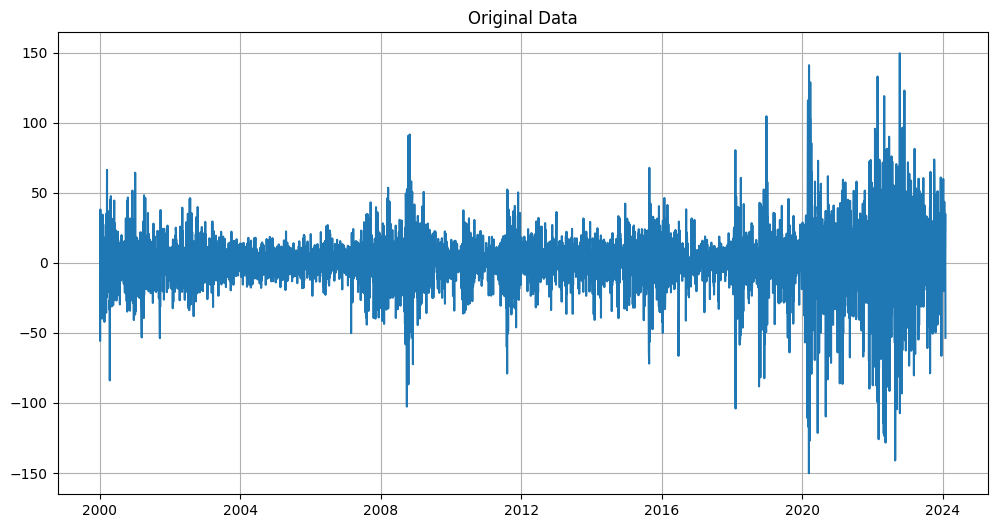

In [5]:
plt = config_chart('Original Data')
plt.plot(data)

---

## For **normalize_data** function

In [6]:
normalized_data = normalize_data(data)
normalized_data

,Change
Date,
2000-01-03,-0.091339
2000-01-04,-0.370027
2000-01-05,0.020217
2000-01-06,0.011210
2000-01-07,0.255940
...,...
2024-01-25,0.052310
2024-01-26,0.016015
2024-01-29,0.235656


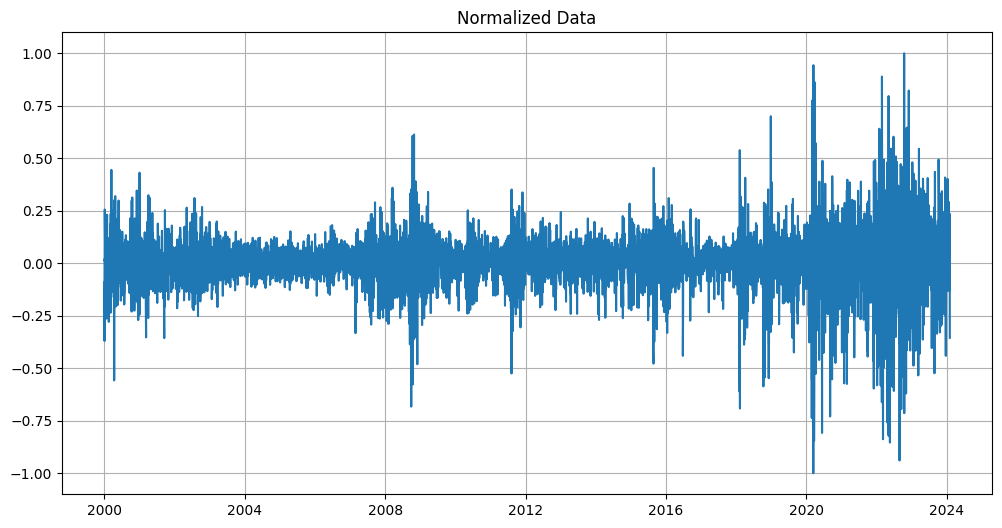

In [7]:
plt = config_chart('Normalized Data')
plt.plot(normalized_data)

----

## For **prepare_sequences** function

In [8]:
sequences = prepare_sequences(normalized_data)

In [9]:
sequences.x.shape, sequences.y.shape, sequences.dates.shape

((6053, 5), (6053, 1), (6053,))

In [10]:
sequences.x[0]                  

array([-0.09133853, -0.37002746,  0.02021718,  0.01121014,  0.25593961])

In [11]:
sequences.x

array([[-0.09133853, -0.37002746,  0.02021718,  0.01121014,  0.25593961],
       [-0.37002746,  0.02021718,  0.01121014,  0.25593961,  0.10988934],
       [ 0.02021718,  0.01121014,  0.25593961,  0.10988934, -0.12476452],
       ...,
       [-0.01767772,  0.05431347, -0.13123861,  0.05230991,  0.0160146 ],
       [ 0.05431347, -0.13123861,  0.05230991,  0.0160146 ,  0.23565645],
       [-0.13123861,  0.05230991,  0.0160146 ,  0.23565645, -0.00386784]])

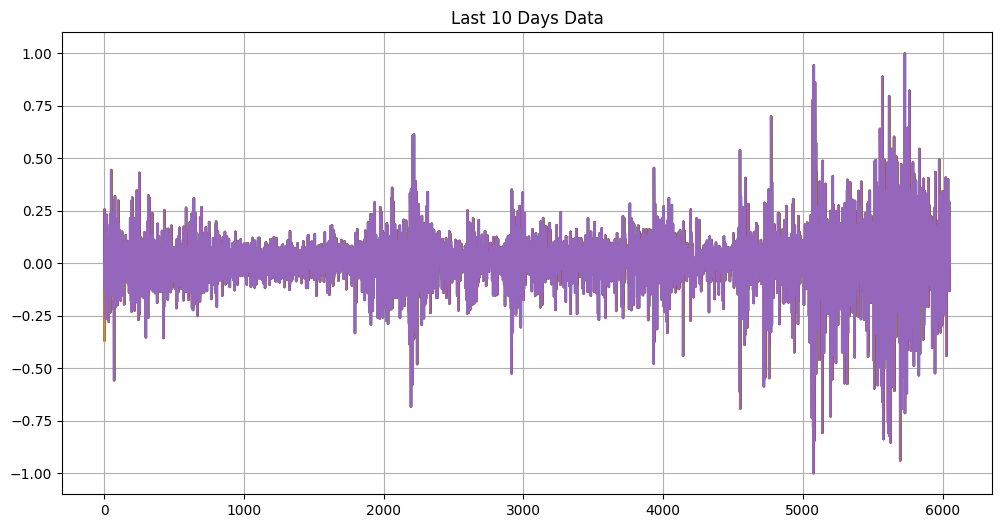

In [12]:
# plot_chart_line(x, label='Price', title='Data')
plt = config_chart('Last 10 Days Data')
plt.plot(sequences.x)

In [13]:
sequences.y[0]

array([0.10988934])

In [14]:
sequences.y

array([[ 0.10988934],
       [-0.12476452],
       [-0.03983085],
       ...,
       [ 0.23565645],
       [-0.00386784],
       [-0.35494948]])

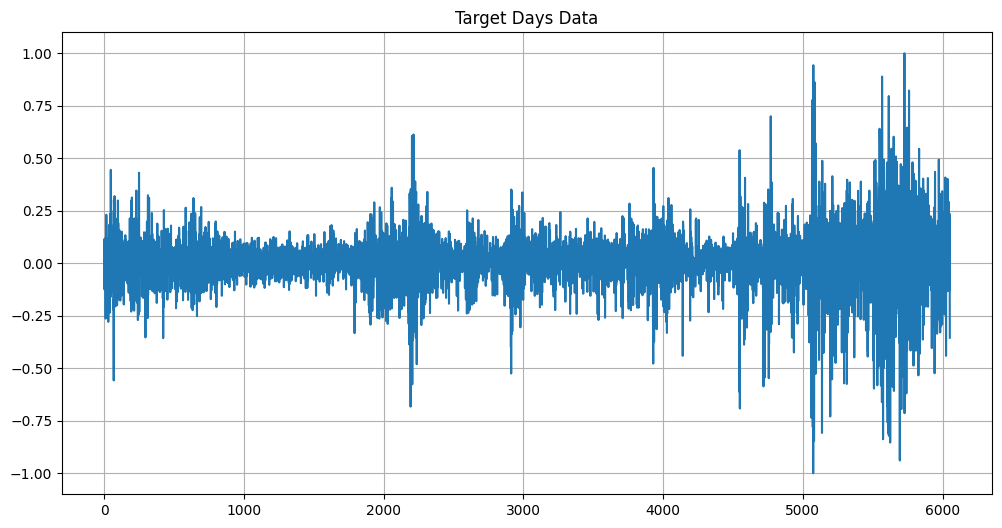

In [15]:
plt = config_chart('Target Days Data')
plt.plot(sequences.y)

In [16]:
sequences.dates

array(['2000-01-10T00:00:00.000000000', '2000-01-11T00:00:00.000000000',
       '2000-01-12T00:00:00.000000000', ...,
       '2024-01-29T00:00:00.000000000', '2024-01-30T00:00:00.000000000',
       '2024-01-31T00:00:00.000000000'], dtype='datetime64[ns]')

---

## For **split_train_and_test_data** function

In [17]:
train, test, predict = split_train_and_test_data(sequences)

In [18]:
train.x.shape, train.y .shape, train.dates  .shape

((4842, 5), (4842, 1), (4842,))

In [19]:
test.x.shape, test.y.shape, test.dates.shape

((605, 5), (605, 1), (605,))

In [20]:
predict.x.shape, predict.y.shape, predict.dates.shape

((606, 5), (606, 1), (606,))

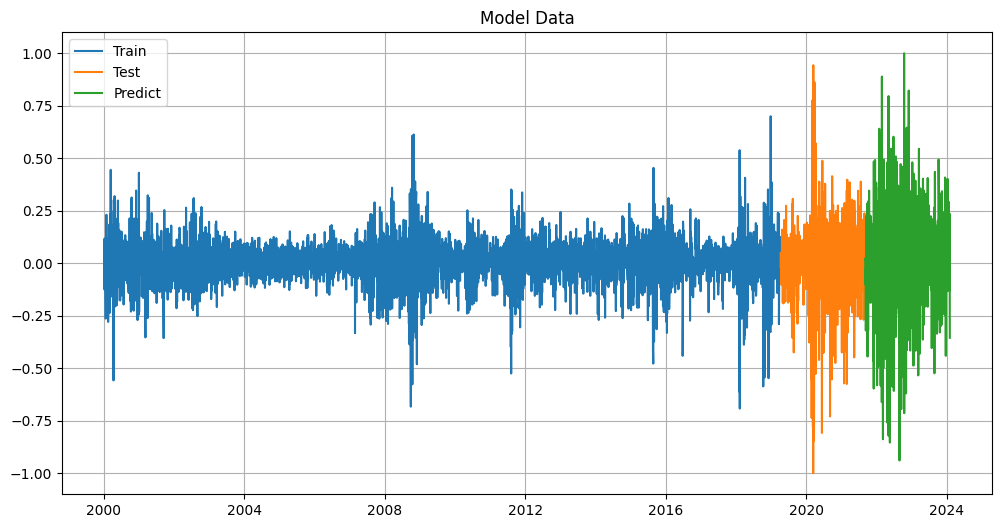

In [21]:
plt = config_chart('Model Data')
plt.plot(train.dates, train.y)
plt.plot(test.dates, test.y)
plt.plot(predict.dates, predict.y)
plt.legend(['Train', 'Test', 'Predict'])

---

## For **get_lstm_data** function

In [22]:
train, test, predict = get_lstm_data(SP500_TICKER)

In [23]:
print(train.dates.shape) 
print(train.dates[0])

print(train.x.shape) 
print(train.x[0])

print(train.y.shape)
print(train.y[0])

(4842,)
2000-01-10T00:00:00.000000000
(4842, 5)
[-0.09133853 -0.37002746  0.02021718  0.01121014  0.25593961]
(4842, 1)
[0.10988934]


In [24]:
print(test.dates.shape) 
print(test.dates[0])

print(test.x.shape) 
print(test.x[0])

print(test.y.shape)
print(test.y[0])

(605,)
2019-04-10T00:00:00.000000000
(605, 5)
[-0.01567905  0.03829805  0.0595162   0.05104262 -0.05364236]
(605, 1)
[0.04790535]


In [25]:
print(predict.dates.shape) 
print(predict.dates[0])

print(predict.x.shape) 
print(predict.x[0])

print(predict.y.shape)
print(predict.y[0])

(606,)
2021-09-02T00:00:00.000000000
(606, 5)
[-0.15619021  0.2375916   0.10255193 -0.04490001 -0.029155  ]
(606, 1)
[0.01875117]
